In [66]:
# let matplot figure show in notebook instead of new window
%matplotlib inline
import random
import torch
import matplotlib
# !pip install git+https://github.com/d2l-ai/d2l-zh@release
from d2l import torch as d2l

In [67]:
def synthetic_data(w, b, num_examples):  # @save
    '''generate y=Xw+b+noise'''
    X = torch.normal(0, 1, (num_examples, len(w)))

    print(f'X.shape={X.shape},w.shape={w.shape},b={b}')
    print(f'Xw.shape={torch.matmul(X,w).shape}')

    y = torch.matmul(X, w)+b

    print(f'y.shape={y.shape}')

    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print(f'features.shape={features.shape}, labels.shape={labels.shape}')


X.shape=torch.Size([1000, 2]),w.shape=torch.Size([2]),b=4.2
Xw.shape=torch.Size([1000])
y.shape=torch.Size([1000])
features.shape=torch.Size([1000, 2]), labels.shape=torch.Size([1000, 1])


In [68]:
print('features:',features[0],'\nlabels:',labels[0])

features: tensor([0.4433, 1.2435]) 
labels: tensor([0.8708])


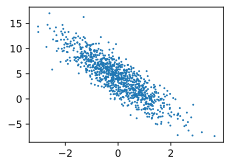

In [69]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy(),1)

In [70]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    # print(f'num_examples={num_examples}')
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)])
        # print(f'batch_indices={batch_indices}')
        yield features[batch_indices], labels[batch_indices]


In [71]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


tensor([[ 0.0433,  0.8691],
        [-1.3107, -0.6310],
        [-0.6338,  1.1731],
        [-0.7239,  0.2784],
        [-2.0968, -1.4902],
        [-0.3756, -0.5132],
        [ 0.6192,  0.2658],
        [ 2.4979,  1.0832],
        [-1.7062, -0.2667],
        [-0.4890, -0.8173]]) 
 tensor([[ 1.3130],
        [ 3.7215],
        [-1.0521],
        [ 1.7989],
        [ 5.0720],
        [ 5.2045],
        [ 4.5355],
        [ 5.5197],
        [ 1.6903],
        [ 5.9828]])


In [72]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


In [73]:
def linreg(X, w, b):
    '''linear regression model'''
    return torch.matmul(X, w)+b


In [74]:
def squared_loss(y_hat, y):
    '''均方损失'''
    return (y_hat - y.reshape(y_hat.shape))**2/2


In [75]:
def sgd(params, lr, batch_size):
    '''小批量梯度下降'''
    with torch.no_grad(): # don't calculate gradient calculation here
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()


In [76]:
lr = 0.03  # learning rate hyperparameter
num_epoches = 3  # training epoches hyperparameter
net = linreg  # linear regression model
loss = squared_loss  # squared loss function
for epoch in range(num_epoches):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():  # don't calculate gradient calculation here
        print(f'features.shape = {features.shape}, w.shape={w.shape} , net(features, w, b).shape = {net(features, w, b).shape}')
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')


features.shape = torch.Size([1000, 2]), w.shape=torch.Size([2, 1]) , net(features, w, b).shape = torch.Size([1000, 1])
epoch 1, loss 0.033716
features.shape = torch.Size([1000, 2]), w.shape=torch.Size([2, 1]) , net(features, w, b).shape = torch.Size([1000, 1])
epoch 2, loss 0.000128
features.shape = torch.Size([1000, 2]), w.shape=torch.Size([2, 1]) , net(features, w, b).shape = torch.Size([1000, 1])
epoch 3, loss 0.000050


In [77]:
print(f'estimate error of w: {true_w - w.reshape(true_w.shape)}')
print(f'estimate error of b: {true_b - b}')


estimate error of w: tensor([-3.3498e-04,  2.4080e-05], grad_fn=<SubBackward0>)
estimate error of b: tensor([-0.0001], grad_fn=<RsubBackward1>)
